In [1]:
# Dependencies 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk


In [2]:
# Some paths
rootPath = '/Users/frederictheunissen/Code/songephys/'
dataPath = 'data/birds/'

# Our color code for calls
callColor = {'Be': (0/255.0, 230/255.0, 255/255.0), 'LT': (0/255.0, 95/255.0, 255/255.0), 'Tu': (255/255.0, 200/255.0, 65/255.0), 'Th': (255/255.0, 150/255.0, 40/255.0), 
             'Di': (255/255.0, 105/255.0, 15/255.0), 'Ag': (255/255.0, 0/255.0, 0/255.0), 'Wh': (255/255.0, 180/255.0, 255/255.0), 'Ne': (255/255.0, 100/255.0, 255/255.0),
             'Te': (140/255.0, 100/255.0, 185/255.0), 'DC': (100/255.0, 50/255.0, 200/255.0), 'So': (0/255.0, 0/255.0, 0/255.0)}

# Call names are in alphabetical order (to check...)

callNames = ['Ag', 'Be', 'DC', 'Di', 'LT', 'Ne', 'So', 'Te', 'Th', 'Wh']

In [3]:
# First load the data

numUnits = [1, 2, 3, 4, 5, 10, 15]
argList = []
pcc = []
confMat = []
selH = []

for nUnit in numUnits:
    inPath = rootPath+ dataPath + 'HerminaDataBase%dGoodUnitPCPerBird.pkl' % nUnit
    fileIn = open(inPath,"rb")
    argList.append(pk.load(fileIn))
    confMat.append(pk.load(fileIn))
    pcc.append(pk.load(fileIn))
    selH.append(pk.load(fileIn))
    zoneUnique = pk.load(fileIn)
    fileIn.close()


In [4]:
breakflg = False
unitNumber = np.zeros((len(numUnits), len(zoneUnique)))
for i, nUnit in enumerate(numUnits):

    for j, zone in enumerate(zoneUnique):
        # Number of ensembles
        nEn = len(argList[i][j])  # Note the plus one here to to skip the area that was "Border"
        unitNumber[i][j] = np.unique(argList[i][j]).shape[0]
        print(i, j, 'nEn', nEn, 'pcc',pcc[i][j].shape[0], 'units', unitNumber[i][j] )

0 0 nEn 43 pcc 43 units 43.0
0 1 nEn 19 pcc 19 units 19.0
0 2 nEn 16 pcc 16 units 16.0
0 3 nEn 22 pcc 22 units 22.0
1 0 nEn 903 pcc 903 units 43.0
1 1 nEn 171 pcc 171 units 19.0
1 2 nEn 120 pcc 120 units 16.0
1 3 nEn 231 pcc 231 units 22.0
2 0 nEn 10000 pcc 10000 units 43.0
2 1 nEn 969 pcc 969 units 19.0
2 2 nEn 560 pcc 560 units 16.0
2 3 nEn 1540 pcc 1540 units 22.0
3 0 nEn 10000 pcc 10000 units 43.0
3 1 nEn 3876 pcc 3876 units 19.0
3 2 nEn 1820 pcc 1820 units 16.0
3 3 nEn 7315 pcc 7315 units 22.0
4 0 nEn 10000 pcc 10000 units 43.0
4 1 nEn 10000 pcc 10000 units 19.0
4 2 nEn 4368 pcc 4368 units 16.0
4 3 nEn 10000 pcc 10000 units 22.0
5 0 nEn 10000 pcc 10000 units 43.0
5 1 nEn 10000 pcc 10000 units 19.0
5 2 nEn 8008 pcc 8008 units 16.0
5 3 nEn 10000 pcc 10000 units 22.0
6 0 nEn 10000 pcc 10000 units 43.0
6 1 nEn 3876 pcc 3876 units 19.0
6 2 nEn 16 pcc 16 units 16.0
6 3 nEn 10000 pcc 10000 units 22.0


In [5]:
# Calculate the Mean and Max of the pcc
topPercent = 5.0
pccMean = np.zeros((len(numUnits), len(zoneUnique)))
pccMax = np.zeros((len(numUnits), len(zoneUnique)))
pccSD = np.zeros((len(numUnits), len(zoneUnique)))

for i, nUnit in enumerate(numUnits):
    for j, zone in enumerate(zoneUnique):

        pccMean[i][j] = np.mean(pcc[i][j])
        
        fac = np.sqrt(unitNumber[i][j]/(unitNumber[i][j]-nUnit))
        pccSD[i][j] =  np.std(pcc[i][j])*fac
        
        # Max values (averaged over the topPercent)
        indSort = np.argsort(pcc[i][j])
        ls = len(indSort)
        ns = int(ls*topPercent/100.0)
        indGood = indSort[-ns-1:-1]
        pccMax[i][j] = np.mean(pcc[i][j][indGood])

/Users/frederictheunissen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/frederictheunissen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


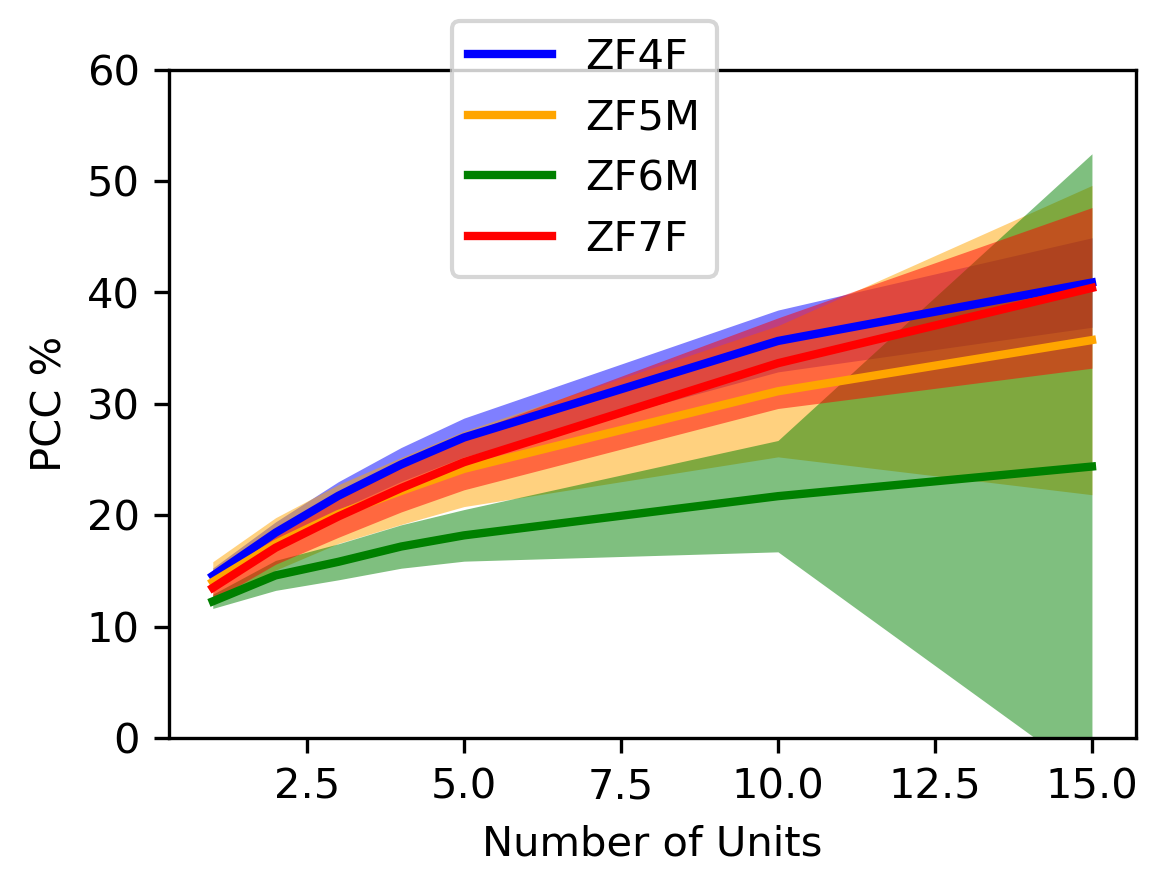

In [6]:
# Make plot of mean values
fig, ax1 = plt.subplots(figsize=(4, 3), dpi =300)
colorName = ['blue', 'orange', 'green', 'red']

ax1.set_xlabel('Number of Units')
ax1.set_ylabel('PCC %')

for izone, zone in enumerate(zoneUnique):
    ax1.plot(numUnits, pccMean[:,izone], color=colorName[izone], linestyle='-', linewidth=2, label=zone)
    df= np.zeros(len(numUnits))

    ax1.fill_between(numUnits, pccMean[:,izone] + 2*pccSD[:,izone]/np.sqrt(unitNumber[:,izone]-numUnits),
                               pccMean[:,izone] - 2*pccSD[:,izone]/np.sqrt(unitNumber[:,izone]-numUnits), 
                               alpha=0.5, linewidth=0, color = colorName[izone] )
    # ax1.plot(numUnits, pccMax[:,izone], color=colorName[izone], linestyle='--', linewidth=2, label=zone +' Max')


ax1.set_ylim((0,60))



fig.tight_layout()
fig.legend(loc='upper center')

plt.savefig('/Users/frederictheunissen/Desktop/PCCvsUnitsvsBird.eps')

In [7]:
# Perform the statistical analysis for male vs female birds
from scipy.stats import t as tdist

# Female weighted mean
nE = numUnits[6]
n1F = unitNumber[6,0]-nE+1
n2F = unitNumber[6,3]-nE+1
dfF = n1F+n2F-2

pccMeanFemale = (n1F*pccMean[6,0]+n2F*pccMean[6,3])/(n1F+n2F)
pccSDFemale = np.sqrt( (pccSD[6,0]**2*(n1F-1) + pccSD[6,3]**2*(n2F-1)) / dfF)

n1M = unitNumber[6,1]-nE+1
n2M = unitNumber[6,2]-nE+1
dfM = n1M+n2M-2
pccMeanMale = (n1M*pccMean[6,1]+n2M*pccMean[6,2])/(n1M+n2M)
pccSDMale = np.sqrt( (pccSD[6,1]**2*(n1M-1) + pccSD[6,2]**2*(n2M-1)) / dfM)

diffMean = pccMeanFemale - pccMeanMale

# I am going to use the equal variance assumption
n0 = 2
n1 = 2
df = (n0 + n1 - 2)
pooledSD = np.sqrt( (pccSDFemale**2*(n0-1) + pccSDMale**2*(n1-1)) / df)

tval = diffMean/(pooledSD*np.sqrt(1/n0 + 1/n1))
dval = diffMean/pooledSD

# Two tail t-test
pval = 2*(1 - tdist.cdf(abs(tval), df))

print('PCC d=', dval, 't(', df, ')=', tval, 'p=', pval)



PCC d= 0.6757557000043768 t( 2 )= 0.6757557000043768 p= 0.5688598698151548


In [8]:
diffMean

8.301637441120768